# shortcut
- Ctrl + / #comment

# Development Node
- loss function
- set the appropriate dimension of output
- training


# 한글 폰트 설정

In [131]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# import library and data

In [132]:
import pandas as pd
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import numpy as np
%matplotlib inline  
plt.rc('font', family='NanumBarunGothic') 

import seaborn as sns

#timestamp
from datetime import datetime
import time

#import libaray
import tensorflow as tf

In [133]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [134]:
'''
import os 
import tqdm

#save the datafrmae
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/'):
  print(filenames)
  for filename in filenames[0:5]: 
    str=os.path.join(dirname, filename)
    df[i] = pd.DataFrame(pd.read_excel(str, header=2))
    df_data[i] = df[0:29].iloc[:,2:26]

'''


"\nimport os \nimport tqdm\n\n#save the datafrmae\nfor dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/'):\n  print(filenames)\n  for filename in filenames[0:5]: \n    str=os.path.join(dirname, filename)\n    df[i] = pd.DataFrame(pd.read_excel(str, header=2))\n    df_data[i] = df[0:29].iloc[:,2:26]\n\n"

In [135]:
import os
import os.path
file_list = os.listdir("/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/")

In [136]:
#file_list[0:4]

In [137]:
#type(file_list)

In [138]:
file_list.sort()

In [139]:
#file_list[0:4]

In [140]:
#convert file_list into date_ist
date_list = []
for filename in file_list[1:20]:  
  split = filename.split('-', 1) #split by '-'; one time  
  date = split[1].split('.')[0]
  date_list.append(date)

print(len(date_list))
print(date_list)

19
['2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20', '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28', '2019-01-29']


In [141]:
#store files in Pandas Series total_sum
#index is timestamp and value is electricity amount
#df = [] #list
#data = pd.DataFrame([])
total_sum = pd.Series([], name='electricity', dtype='float64')

for date in date_list:                                            
  #load data
  ##load peak1
  temp_data_1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/"+"Peak01-"+date+'.xls', header=2)
  temp_data_1 = temp_data_1[0:29].iloc[:,2:26]
  sum_data_1 = temp_data_1.sum(axis=0)
  ##load peak2
  temp_data_2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/"+"Peak02-"+date+'.xls', header=2)
  temp_data_2 = temp_data_2[0:26].iloc[:,2:26]
  sum_data_2 = temp_data_2.sum(axis=0)
  ##load peak3
  temp_data_3 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/"+"Peak03-"+date+'.xls', header=2)
  temp_data_3 = temp_data_3[0:20].iloc[:,2:26]
  sum_data_3 = temp_data_3.sum(axis=0)
  ##sum
  sum = pd.concat([sum_data_1, sum_data_2, sum_data_3], axis=1)
  sum = sum.sum(axis=1)
  #print(sum)
  #print(sum.index)
    
  #convert colnames into timestamp and get total energy consumption per hour
  #print(date)
  timestamp = [0] * len(sum.index) #initialization
  for i in range(len(sum.index)):
    timestamp[i] = time.mktime(datetime.strptime(date + ' ' + sum.index[i], '%Y-%m-%d %H:%M').timetuple())
  sum.index = timestamp
  #print("timestamp: ", timestamp)

  #save on panda series (For tensorflow, it sholud be converted into np.array)
  total_sum = pd.concat([total_sum, sum], axis=0)
  
print(total_sum.shape)
print(total_sum)

(456,)
1.547165e+09    5021.994166
1.547168e+09    4778.101755
1.547172e+09    4591.368343
1.547176e+09    4555.439355
1.547179e+09    4517.535169
                   ...     
1.548788e+09    5509.424163
1.548792e+09    5483.646978
1.548796e+09    5395.471849
1.548799e+09    5058.342174
1.548803e+09    4853.540936
Length: 456, dtype: float64


In [142]:
timestamp = pd.Series(total_sum.index)
timestamp.index = total_sum.index
df_data = pd.concat([total_sum, timestamp], axis = 1, ignore_index=True)
df_data.columns = ['electricity', 'timestamp']
print(df_data)
del timestamp

              electricity     timestamp
1.547165e+09  5021.994166  1.547165e+09
1.547168e+09  4778.101755  1.547168e+09
1.547172e+09  4591.368343  1.547172e+09
1.547176e+09  4555.439355  1.547176e+09
1.547179e+09  4517.535169  1.547179e+09
...                   ...           ...
1.548788e+09  5509.424163  1.548788e+09
1.548792e+09  5483.646978  1.548792e+09
1.548796e+09  5395.471849  1.548796e+09
1.548799e+09  5058.342174  1.548799e+09
1.548803e+09  4853.540936  1.548803e+09

[456 rows x 2 columns]


# Data exploration with one file

# rolling mean

In [143]:
#df_data.columns = [i for i in range(24)]

In [144]:
# ma = 2
# df_data.rolling(ma).mean()

In [145]:
# plt.figure(figsize=(40,20))
# df_data.T.rolling(ma).mean().plot()

In [146]:
# #initialization
# average=pd.DataFrame([])

# #for loop
# for ma in ma_time:
#     for time in df_data.columns:
#         average[ma] = df_data.rolling(ma).mean()

# Weather information

In [147]:
weather = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/weather/OBS_ASOS_TIM_20210711215129.csv", header=0, encoding='CP949'))

In [148]:
weather.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,156,광주,2019-01-10 00:00,0.2,0.0,NaN,NaN,0.2,NaN,0,NaN,39,0.0,2.4,-12.1,1019.4,0.0,1028.6,0.0,NaN,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,1981,NaN,NaN,-1.5,0.0,NaN,NaN,NaN,NaN
1,156,광주,2019-01-10 01:00,-0.2,0.0,NaN,NaN,0.6,NaN,270,NaN,39,0.0,2.3,-12.5,1019.1,0.0,1028.3,0.0,NaN,9.0,NaN,NaN,NaN,10.0,10.0,NaN,34.0,1995,NaN,NaN,-1.4,0.0,NaN,NaN,NaN,NaN
2,156,광주,2019-01-10 02:00,-0.5,0.0,NaN,NaN,0.1,NaN,0,NaN,42,0.0,2.5,-11.8,1019.2,0.0,1028.4,0.0,NaN,9.0,NaN,NaN,NaN,9.0,9.0,NaN,28.0,1987,NaN,NaN,-1.4,0.0,NaN,NaN,NaN,NaN
3,156,광주,2019-01-10 03:00,-0.3,0.0,NaN,NaN,0.0,NaN,0,NaN,42,0.0,2.5,-11.6,1019.0,0.0,1028.2,0.0,NaN,9.0,NaN,NaN,NaN,10.0,10.0,As,28.0,1983,NaN,NaN,-1.3,0.0,NaN,NaN,NaN,NaN
4,156,광주,2019-01-10 04:00,0.0,0.0,NaN,NaN,0.0,NaN,0,NaN,35,0.0,2.1,-13.6,1018.6,0.0,1027.8,0.0,NaN,9.0,NaN,NaN,NaN,10.0,10.0,As,26.0,2000,NaN,NaN,-1.3,0.0,NaN,NaN,NaN,NaN


In [149]:
#weather.isnull().any()

In [150]:
weather_df = weather.iloc[:,[2,3,5,7,9,11,13,14,15,17,24,28,31]]

In [151]:
#weather_df.head()

In [152]:
#replace NaN with 0 in 강수량
temp = weather_df.iloc[:,2].fillna(0).copy() #different memory space
weather_df.iloc[:,2] = temp
del temp
print(weather_df.head())

                 일시  기온(°C)  강수량(mm)  ...  전운량(10분위)  시정(10m)  지면온도(°C)
0  2019-01-10 00:00     0.2      0.0  ...        9.0     1981      -1.5
1  2019-01-10 01:00    -0.2      0.0  ...       10.0     1995      -1.4
2  2019-01-10 02:00    -0.5      0.0  ...        9.0     1987      -1.4
3  2019-01-10 03:00    -0.3      0.0  ...       10.0     1983      -1.3
4  2019-01-10 04:00     0.0      0.0  ...       10.0     2000      -1.3

[5 rows x 13 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [153]:
#weather_df[weather_df.isnull().any(axis=1)]['전운량(10분위)']

In [154]:
#replace NaN with 0 in 전운량
for i in weather_df[weather_df.isnull().any(axis=1)]['전운량(10분위)'].index:
  print(i)

  if (weather_df['전운량(10분위)'][i-1] == weather_df['전운량(10분위)'][i-1] and weather_df['전운량(10분위)'][i+1] == weather_df['전운량(10분위)'][i+1] ):  #Both previous and next value is not null
        weather_df['전운량(10분위)'][i] = (weather_df['전운량(10분위)'][i-1] + weather_df['전운량(10분위)'][i+1])/2
  elif (weather_df['전운량(10분위)'][i-1] == weather_df['전운량(10분위)'][i-1]) :  #Only previous value is not null
        weather_df['전운량(10분위)'][i] = weather_df['전운량(10분위)'][i-1]
  elif (weather_df['전운량(10분위)'][i+1] == weather_df['전운량(10분위)'][i+1]) : #Only next value is not null
        weather_df['전운량(10분위)'][i] = weather_df['전운량(10분위)'][i+1]
  else :
        print('think')                                 



985
1027
1028
1030
2182
3241
3308
3310
3311
3313
3314
3509
3673
3932
8348
8515


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [155]:
#weather_df.isnull().any()

In [156]:
#convert time into timestamp
weather_df.rename(columns={"일시":"timestamp"}, inplace=True)
length = len(weather_df['timestamp']) #variable
timestamp = [0] * length #initialization
for i in range(length):
  timestamp[i] = time.mktime(datetime.strptime(weather_df['timestamp'][i], '%Y-%m-%d %H:%M').timetuple())
weather_df['timestamp'] = timestamp

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [157]:
weather_df.head()

,timestamp,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C)
0,1.547078e+09,0.2,0.0,0.2,0,39,2.4,-12.1,1019.4,1028.6,9.0,1981,-1.5
1,1.547082e+09,-0.2,0.0,0.6,270,39,2.3,-12.5,1019.1,1028.3,10.0,1995,-1.4
2,1.547086e+09,-0.5,0.0,0.1,0,42,2.5,-11.8,1019.2,1028.4,9.0,1987,-1.4
3,1.547089e+09,-0.3,0.0,0.0,0,42,2.5,-11.6,1019.0,1028.2,10.0,1983,-1.3
4,1.547093e+09,0.0,0.0,0.0,0,35,2.1,-13.6,1018.6,1027.8,10.0,2000,-1.3


In [158]:
#merge with df_data
if('기온(°C)' not in df_data.columns):
  df_data = pd.merge(df_data, weather_df, how='inner', on='timestamp')

In [159]:
df_data.head(3)

,electricity,timestamp,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C)
0,5021.994166,1.547165e+09,0.9,0.0,1.4,50,83,5.4,-1.6,1017.5,1026.7,0.0,1613,-1.8
1,4778.101755,1.547168e+09,-0.1,0.0,2.2,50,83,5.0,-2.6,1017.9,1027.1,0.0,1441,-2.2
2,4591.368343,1.547172e+09,0.1,0.0,2.1,50,79,4.9,-3.1,1018.0,1027.2,9.0,1382,-2.4


# Low Pass Filter

Low pass filter example

In [160]:
#import library
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [161]:
rng = np.random.default_rng()
t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1*np.sin(2*np.pi*1.25*t + 1) +
     0.18*np.cos(2*np.pi*3.85*t))
xn = x + rng.standard_normal(len(t)) * 0.08

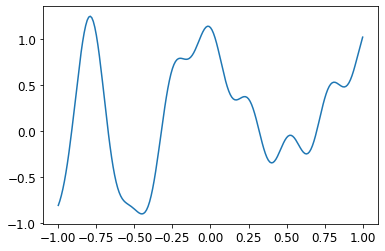

In [162]:
plt.plot(t, x)

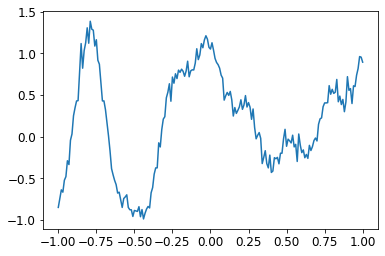

In [163]:
plt.plot(t, xn)

In [164]:
b, a = signal.butter(1, 0.05) #order of filter, the critical frequency

In [165]:
#Apply the filter to xn. 
zi = signal.lfilter_zi(b, a) #Use lfilter_zi to choose the initial condition of the filte. Compute initial state (steady state of step response) for lfilter.
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])

In [166]:
#Apply the filter again, to have a result filtered at an order the same as filtfilt:
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

In [167]:
y = signal.filtfilt(b, a, xn)

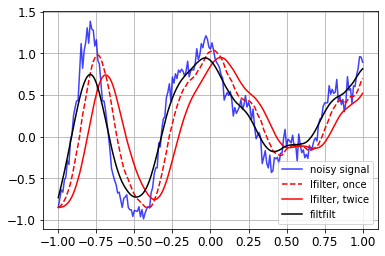

In [168]:
plt.figure
plt.plot(t, xn, 'b', alpha=0.75) #noisy signal
plt.plot(t, z, 'r--')  #lfilter, one
plt.plot(t, z2, 'r') #lfilter, twice
plt.plot(t, y, 'k') #lfilter
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
plt.grid(True)
plt.show()

In [169]:
b, a = signal.butter(3, 0.05)
y = signal.filtfilt(b, a, xn)
    #b : The numerator coefficient vector in a 1-D sequence.
    #a : The denominator coefficient vector in a 1-D sequence. If a[0] is not 1, then both a and b are normalized by a[0].

Apply the low pass filter in our data

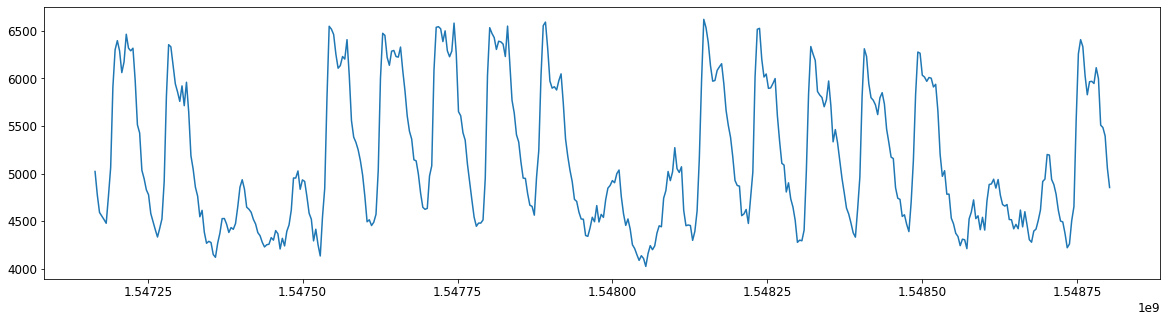

In [170]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

xn = df_data['electricity']
t = df_data['timestamp']
plt.plot(t, xn)

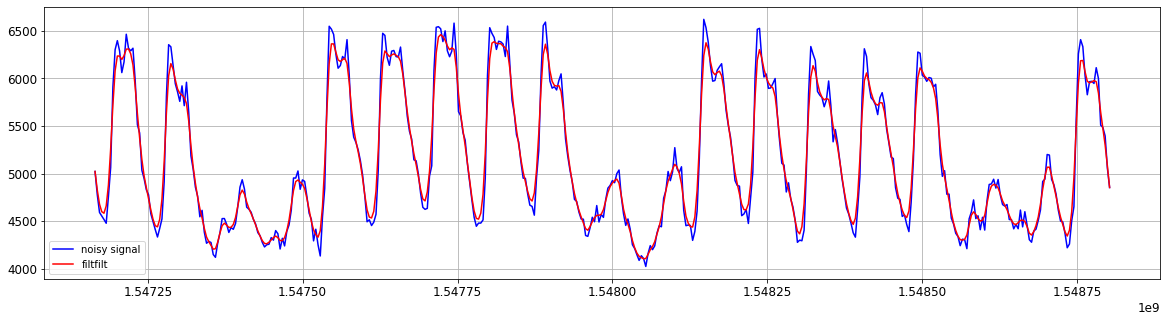

In [171]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#filter variable
b, a = signal.butter(1, 0.3)

y = signal.filtfilt(b, a, xn)

plt.figure
plt.subplot(1,1,1)
plt.plot(t, xn, 'b')
plt.plot(t, y, 'r') #lfilter
plt.legend(('noisy signal','filtfilt'), loc='best')
plt.grid(True)
plt.show()


In [172]:
#assign the filter result into dataframe
df_data['electricity'] = y

# timestamp

In [173]:
#import library
#from datetime import datetime
#import time


In [174]:
#filename = 'Peak03-2019-01-31.xls'
#split = filename.split('-', 1) #split by '-'; one time
#date = split[1].split('.')[0]

#print(date)

In [175]:
#timestamp example
#print(date + ' ' + df_data.columns[0])
#timestamp = time.mktime(datetime.strptime(date + ' ' + df_data.columns[0], '%Y-%m-%d %H:%M').timetuple())
#print(timestamp)

In [176]:
# #initialization
# timestamp = [0] * len(df_data.columns)#

# #for loop
# for i in range(len(df_data.columns)):
#  timestamp[i] = time.mktime(datetime.strptime(date + ' ' + df_data.columns[i], '%Y-%m-%d %H:%M').timetuple())#

# rint(timestamp)
  

# Split and normalize the data

## split

In [177]:
def split_train_test(data, test_ratio): 
  '''
  data : dataframe
  test_ratio : float (e.g.) 0.2
  '''
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [178]:
def split_train_validation_test_indices(length, validation_ratio, test_ratio): 
  '''
  OVERVIEW
  split indices into training, validation, and training set randomly.

  INPUT
  length : integer
  validation_ratio : float (e.g.) 0.2
  test_ratio : float (e.g.) 0.2
  
  OUTPUT
  train_indices : list of indices
  test_indices : list of indices
  '''
  shuffled_indices = np.random.permutation(length)
  validation_set_size = int(length * validation_ratio)
  test_set_size = int(length * test_ratio)
  #print(validation_set_size, test_set_size)

  test_indices = shuffled_indices[:test_set_size]
  validation_indices = shuffled_indices[test_set_size:test_set_size+validation_set_size]
  train_indices = shuffled_indices[test_set_size+validation_set_size:]
  return train_indices, validation_indices, test_indices

In [179]:
training_indices, validation_indices, test_indices = split_train_validation_test_indices(df_data.shape[0],0.2,0.1)

In [180]:
training_indices.sort()
validation_indices.sort()
test_indices.sort()

In [181]:
#print(training_indices)

In [182]:
df_data.shape

(456, 14)

In [183]:
#split data into train, validation, and test set
train_df = df_data.iloc[training_indices, :]
valid_df = df_data.iloc[validation_indices, :]
test_df = df_data.iloc[test_indices, :]

num_features = df_data.shape[1]

In [184]:
# #split data into train, validation, and test set
# x_train = df_data.iloc[training_indices, 1:] #timestamp
# y_train = df_data.iloc[training_indices, 0] #electricity (total_sum)
# x_valid = df_data.iloc[validation_indices, 1:]
# y_valid = df_data.iloc[validation_indices, 0]
# x_test = df_data.iloc[test_indices, 1:]
# y_test = df_data.iloc[test_indices, 0]

In [185]:
# x_train.shape

In [186]:
# x_train.head()

In [187]:
# y_train.shape

In [188]:
# x_train.shape

## normalize

In [189]:
#normalization
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
valid_df = (valid_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_

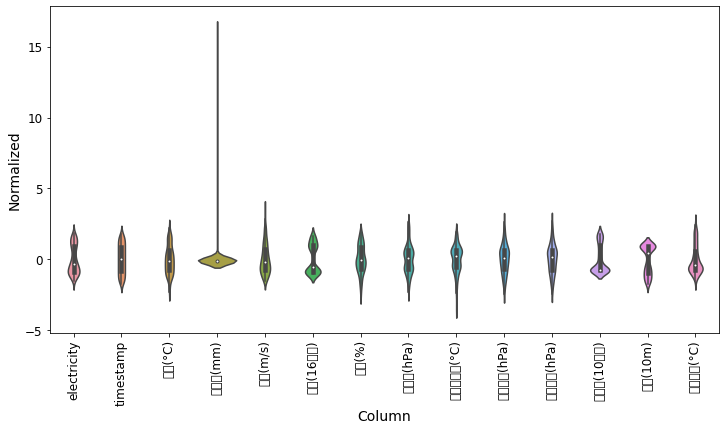

In [190]:
#visualize the result of normalization
df_std = (df_data - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_data.keys(), rotation=90)

In [191]:
# #convert input files into numpy array
# ##variable
# time_steps = 24
# batch_size = int(len(training_indices) / time_steps)
# input_dimensionality = 13 #the number of input features 
# output_dimensionality = 1

# #convert padnas dataframe into numpy array
# x_train, y_train = np.array(x_train), np.array(y_train)
# x_valid, y_valid = np.array(x_valid), np.array(y_valid)
# x_test, y_test = np.array(x_test), np.array(y_test)

# #reshpae the data : [batch size, time_steps (seq_length), dimensionality (input_features)]
# # our example : [#data / 24, 24, 2]
# x_train = np.reshape(x_train, [batch_size, time_steps, input_dimensionality]) 
# y_train = np.reshape(y_train, [batch_size, time_steps, output_dimensionality])
# x_valid = np.reshape(x_valid, [int(len(validation_indices) / time_steps), time_steps, input_dimensionality]) 
# y_valid = np.reshape(y_valid, [int(len(validation_indices) / time_steps), time_steps, output_dimensionality])
# x_test = np.reshape(x_test, [int(len(test_indices) / time_steps), time_steps, input_dimensionality]) 
# y_test = np.reshape(y_test, [int(len(test_indices) / time_steps), time_steps, output_dimensionality])

In [192]:
# print("x_train : ", x_train.shape)
# print("y_train : ", y_train.shape)
# print("x_valid : ", x_valid.shape)
# print("y_valid : ", y_valid.shape)
# print("x_test : ", x_test.shape)
# print("y_test : ", y_test.shape)

# Data windowing
- Indexes and offsets : Handle the indexes and offsets as shown in the diagrams above.
- Split :Split windows of features into a `(features, labels)` pairs.
- Plot : Plot the content of the resulting windows.
- Create tf.data.Datasets : Efficiently generate batches of these windows from the training, evaluation, and test data, using `tf.data.Datasets`.



In [193]:
#ndexes and offsets
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=valid_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [194]:
#Split
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [195]:
# Plot
def plot(self, model=None, plot_col='electricity', max_subplots=3):
  inputs, labels = self.example #inputs for plot
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [196]:
#Create tf.data.Datasets
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

The `WindowGenerator` object holds training, validation and test data. Add properties for accessing them as `tf.data.Datasets` using the above `make_dataset` method. Also add a standard example batch for easy access and plotting:

In [197]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])

Total window size: 7   
Input indices: [0 1 2 3 4 5]   
Label indices: [6]   
Label column name(s): ['T (degC)']   

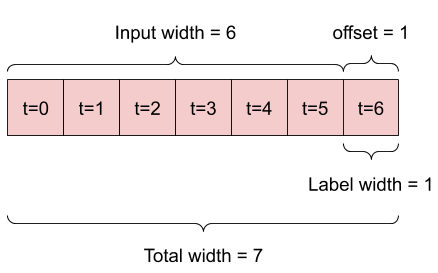


Split the window 


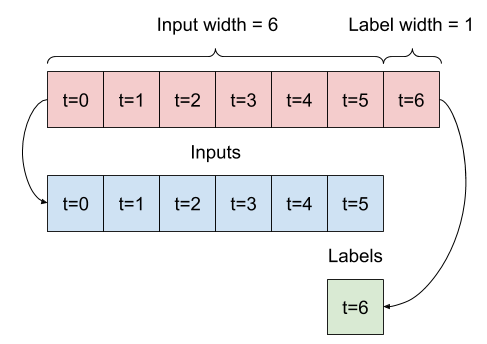

In [198]:
# w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
#                      label_columns=['T (degC)'])

In [199]:
# # Stack three slices, the length of the total window:
# example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
#                            np.array(train_df[100:100+w2.total_window_size]),
#                            np.array(train_df[200:200+w2.total_window_size])])


# example_inputs, example_labels = w2.split_window(example_window)

# print('All shapes are: (batch, time, features)')
# print(f'Window shape: {example_window.shape}')
# print(f'Inputs shape: {example_inputs.shape}')
# print(f'labels shape: {example_labels.shape}')

In [200]:
# w2.plot(plot_col='p (mbar)')

In [201]:
windowGenerator_LSTM = WindowGenerator(input_width=24, label_width=24, shift=1, label_columns= ['electricity'])

In [202]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

# single step model

## baseline

Before building a trainable model it would be good to have a performance baseline as a point for comparison with the later more complicated models.

This first task is to predict temperature 1h in the future given the current value of all features. The current values include the current temperature.

So start with a model that just returns the current temperature as the prediction, predicting "No change". This is a reasonable baseline since temperature changes slowly. Of course, this baseline will work less well if you make a prediction further in the future.   
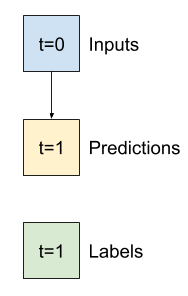

In [203]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['electricity'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['electricity']

In [204]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [205]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

3/3 [==============================] - 0s 4ms/step - loss: 0.7686 - mean_absolute_error: 0.5261


## Linear model
The simplest **trainable** model you can apply to this task is to insert linear transformation between the input and output. In this case the output from a time step only depends on that step:     
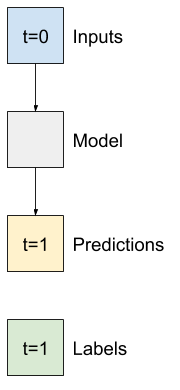   

A `layers.Dense` with no `activation` set is a linear model. The layer only transforms the last axis of the data from `(batch, time, inputs)` to `(batch, time, units)`, it is applied independently to every item across the `batch` and `time` axes.

In [206]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [207]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
10/10 [==============================] - 1s 21ms/step - loss: 2.8713 - mean_absolute_error: 1.2668 - val_loss: 3.5579 - val_mean_absolute_error: 1.5199
Epoch 2/20
10/10 [==============================] - 0s 11ms/step - loss: 2.7940 - mean_absolute_error: 1.2470 - val_loss: 3.4533 - val_mean_absolute_error: 1.4977
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 2.7156 - mean_absolute_error: 1.2297 - val_loss: 3.3572 - val_mean_absolute_error: 1.4772
Epoch 4/20
10/10 [==============================] - 0s 11ms/step - loss: 2.6517 - mean_absolute_error: 1.2136 - val_loss: 3.2608 - val_mean_absolute_error: 1.4561
Epoch 5/20
10/10 [==============================] - 0s 9ms/step - loss: 2.5860 - mean_absolute_error: 1.1969 - val_loss: 3.1715 - val_mean_absolute_error: 1.4358
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 2.5174 - mean_absolute_error: 1.1816 - val_loss: 3.0934 - val_mean_absolute_error: 1.4180
Epoch 7/20
10/10 [=====

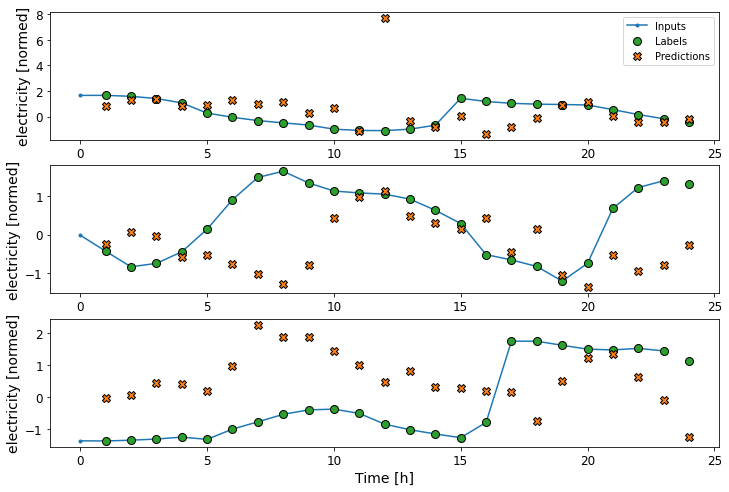

In [208]:
wide_window.plot(linear)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_

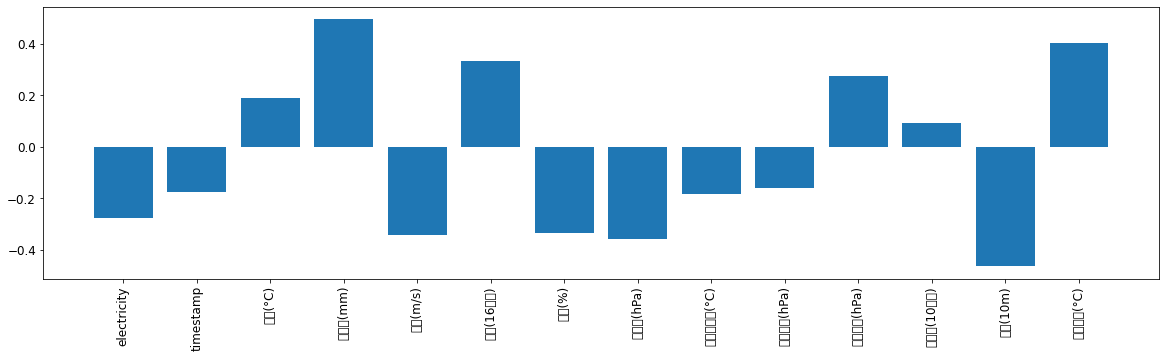

In [209]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## LSTM

An important constructor argument for all keras RNN layers is the `return_sequences` argument. This setting can configure the layer in one of two ways.

1. If `False`, the default, the layer only returns the output of the final timestep, giving the model time to warm up its internal state before making a single prediction:   
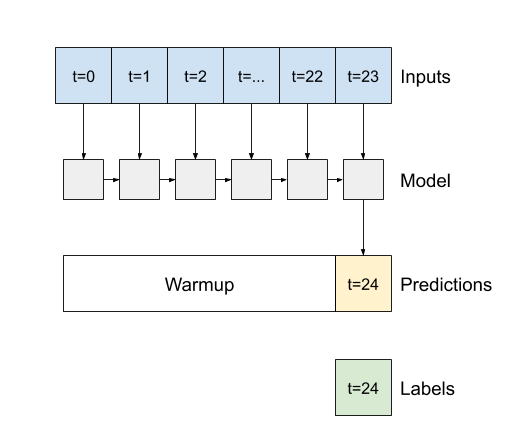

2. If `True` the layer returns an output for each input. This is useful for:
  * Stacking RNN layers. 
  * Training a model on multiple timesteps simultaneously.


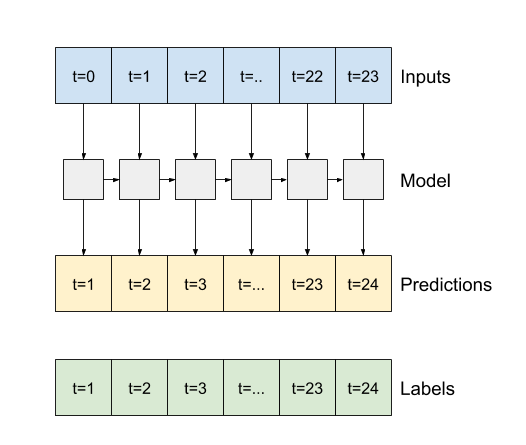

In [210]:
#single step models; multi-output models
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

CPU times: user 159 µs, sys: 0 ns, total: 159 µs
Wall time: 128 µs


In [211]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(24, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

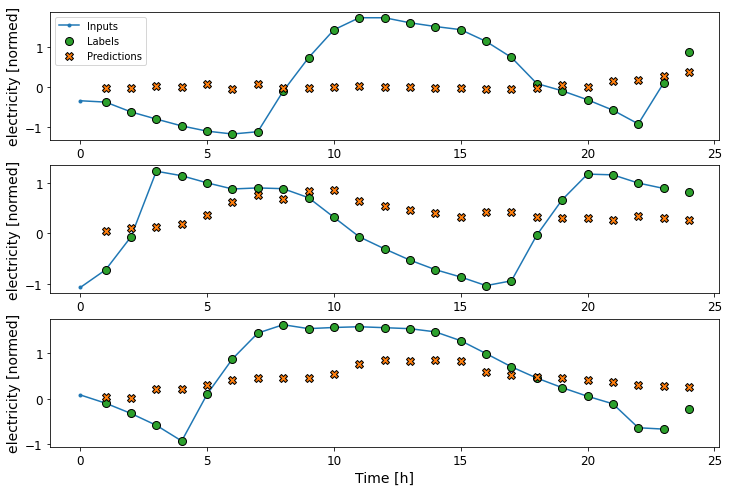

In [212]:
wide_window.plot(lstm_model)

In [213]:
history = compile_and_fit(lstm_model, wide_window)
IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

3/3 [==============================] - 0s 6ms/step - loss: 0.6081 - mean_absolute_error: 0.5997


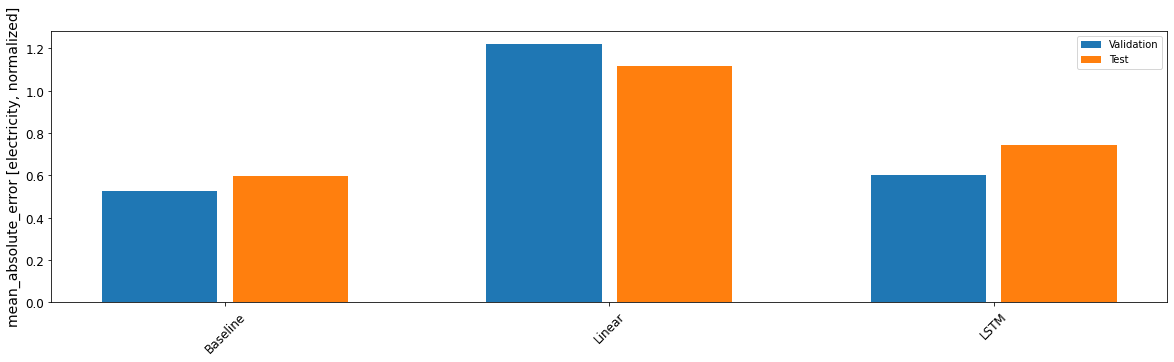

In [214]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [electricity, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [215]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.5993
Linear      : 1.1165
LSTM        : 0.7451


# multi step models

In [216]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

NameError: ignored

# LSTM

## LSTM Model

In [ ]:
def LSTM(rnn_units):
  return tf.keras.layers.LSTM(
      rnn_units,
      return_sequences=True,
      recurrent_initializer='glorot_uniform',
      recurrent_activation='sigmoid',
      stateful=True
  )

In [ ]:
#build model
#input dimension = [batch_size, timesteps, input_features]
model = tf.keras.Sequential([
                    #tf.keras.layers.Embedding(input_dim = 24, output_dim=24, batch_input_shape=[1,24]),
                    tf.keras.layers.LSTM(units=1, batch_input_shape=[1, 24, 1]),
                    #input_dim, output_dim
                    LSTM(24),
                    tf.keras.layers.Dense(24)
])

In [ ]:
#build model
#input dimension = [batch_size, timesteps, input_features]
model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(units=1, batch_input_shape=[None, time_steps, input_dimensionality], return_sequences = True),
                    tf.keras.layers.LSTM(units=1, return_sequences = True),
                    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24))
])

In [ ]:
class CovidPredictor(nn.Module):
    def __init__(self, n_features, n_hidden, seq_len, n_layers):
        super(CovidPredictor, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers
        self.c1 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size = 2, stride = 1) # 1D CNN 레이어 추가
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=n_hidden,
            num_layers=n_layers
        )
        self.linear = nn.Linear(in_features=n_hidden, out_features=1)
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.n_layers, self.seq_len-1, self.n_hidden),
            torch.zeros(self.n_layers, self.seq_len-1, self.n_hidden)
        )
    def forward(self, sequences):
        sequences = self.c1(sequences.view(len(sequences), 1, -1))
        lstm_out, self.hidden = self.lstm(
            sequences.view(len(sequences), self.seq_len-1, -1),
            self.hidden
        )
        last_time_step = lstm_out.view(self.seq_len-1, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
        return y_pred

In [ ]:
#compite the model
model.compile(optimizer='adam', loss='mean_squared_error')
#model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])

In [ ]:
#train the model
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=100,
                    validation_data=(x_valid, y_valid))

In [ ]:
model.evaluate(x_valid, y_valid)

In [ ]:
history.history

In [ ]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    #plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(range(time_steps), y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(range(time_steps), y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, time_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(x_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
save_fig("time_series_plot")
plt.show()

In [ ]:
plt.plot(range(time_steps), y_test[0,:,0])
plt.plot(range(time_steps), y_pred[0,:,0])

Reference
- Hands-on Machine learning, 2nd edition
- https://www.tensorflow.org/tutorials/structured_data/time_series#%EC%84%A4%EC%A0%95